<a href="https://colab.research.google.com/github/severancej/colorful_project/blob/main/AI_14_%EC%9E%A5%EC%A7%80%EC%9D%80_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# <항상 시작 전>라이브러리 불러오기

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
#한글폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
# matplotlib의 폰트를 Nanum 폰트로 지정합니다.
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

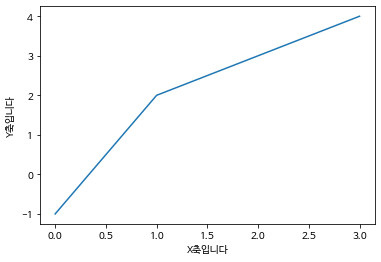

In [4]:
#그래프에서 한글이 잘 나오는지 확인합니다.
plt.plot([-1, 2, 3, 4])
plt.xlabel('X축입니다')
plt.ylabel('Y축입니다')
plt.show()

In [5]:
#파일 업로드
from google.colab import files
uploaded = files.upload() 

Saving vgames2.csv to vgames2 (7).csv


In [6]:
# .read_csv() 활용하여 데이터 불러오기
df = pd.read_csv('vgames2.csv')

#데이터 정제 전 원본copy함
df1 = df.copy()

In [7]:
#시각적 탐색을 위한 코드
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [8]:

#데이터셋의 shape 확인
print(df1.shape)
print("")
print("")

#데이터셋의 info 확인
print(df1.info( ))


(16598, 10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB
None


In [9]:
#🕹️ Data Description
#Name : 게임의 이름입니다.
#Platform : 게임이 지원되는 플랫폼의 이름입니다.
#Year : 게임이 출시된 연도입니다.
#Genre : 게임의 장르입니다.
#Publisher : 게임을 제작한 회사입니다.
#NA_Sales : 북미지역에서의 출고량입니다.
#EU_Sales : 유럽지역에서의 출고량입니다.
#JP_Sales : 일본지역에서의 출고량입니다.
#Other_Sales : 기타지역에서의 출고량입니다.
df1.head( )

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [10]:
# 데이터의 결측치 확인 - df1
pd.DataFrame(df1.isnull().sum(), columns=["결측치 개수"])

,결측치 개수
Unnamed: 0,0
Name,0
Platform,0
Year,271
Genre,50
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [11]:
# 필요없는 열 Unnamed: 0 제거
#제거하는 이유:인덱스가 아니어서 결측값 제거하면 값의 재정렬이 힘들다 
df1.drop(['Unnamed: 0'], axis = 1,inplace = True)
df1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [12]:
# 'Year' 결측데이터를 삭제한 이유는 연도를 추측하는것이 쉽지 않고
#다음분기 게임 설계를 위해 연도별 게임트렌드를 알아야 하는데
#삭제하지 않고 값을 0으로 두면 정확한 연도별 게임트렌드 분석수치가 달라질것 
#같아서 삭제하기로 결정했고,

#'Genre'의 결측데이터는 50개이지만 일일이 이름과 회사를 대조해서  
#일일이 장르를 찾는데 시간이 걸려서 삭제하기로 결정했다.

df1.dropna(subset=['Year', 'Genre'],axis=0, inplace=True)
#삭제 됐는지 확인 = 16598-271 = 16,327
df1.shape


(16277, 9)

In [13]:
#몇개의 데이터가 삭제 됐는지 확인 = 16598-16277 = 321
#전체 데이터 16598개 중 Year와 Genre의 합계 결측치 321개는 
#전체 데이터의 1.93%정도여서, 
#삭제한다해도 분석결과에 큰 영향을 주지 않을거라고 생각한다. 


In [14]:
# column_Year을 이해하기 쉽게 int로 변환
#전체 데이터 보니깐 년도만 표시해서 float형태로 있을 필요가 없음
df1 = df1.astype({'Year':'int'})

In [15]:
#연도별 개수 확인
#이유 이상치 확인 위해서
pd.DataFrame(df1.value_counts(subset = ['Year']), columns=["연도 개수"])

,연도 개수
Year,
2009,1418
2008,1413
2010,1248
2007,1193
2011,1126
...,...
13,2
12,2
94,1


In [16]:
# 전체표 확인 결과 Year가 네자리 형태가 아니고, 100이하인 이상데이터를 확인
less_100 = df1[df1.Year < 100]
#이유 이상value별로 개수 확인 위해서
pd.DataFrame(less_100.value_counts(subset = ['Year']),columns=["연도개수"])

,연도개수
Year,
11,10
8,10
9,10
3,7
6,7
10,7
15,5
16,5
4,4


In [17]:
#Year의 이상value를 네자리수로 맞추기
#20 이하는 +2000을 하고
#20 초과 100 미만은 +1900을 더한다

def correct_Year(Year):
  if (0<= Year) & (Year<=20):
    return Year + 2000
  elif (20<Year) & (Year<=100):
    return Year + 1900
  else:
    return Year

df1['Year'] = df1['Year'].apply(correct_Year)

pd.DataFrame(df1.value_counts(subset = ['Year']), columns=["연도 개수"])

,연도 개수
Year,
2009,1428
2008,1423
2010,1255
2007,1196
2011,1136
2006,1005
2005,939
2002,826
2003,774


In [18]:
#Year의 value값을 오름차순으로 정렬함
#연도별로 보기 위해서
df1.sort_values(by='Year',inplace= True )
#인덱스 재정렬
df1 = df1.reset_index(drop=True)
df1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Freeway,2600,1980,Action,Activision,0.32,0.02,0,0
1,Checkers,2600,1980,Misc,Atari,0.22,0.01,0,0K
2,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0,0.01
3,Bridge,2600,1980,Misc,Activision,0.25,0.02,0,0
4,Asteroids,2600,1980,Shooter,Atari,4,0.26,0,0.05
...,...,...,...,...,...,...,...,...,...
16272,Lego Star Wars: The Force Awakens,XOne,2016,Action,Warner Bros. Interactive Entertainment,0.12,0.1,0,0.02
16273,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0,0,0.01,0
16274,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0,0,0.01,0
16275,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0,0,0.03,0


In [19]:
# 데이터의 남은 결측치 확인 - df1
pd.DataFrame(df1.isnull().sum(), columns=["결측치 개수"])

,결측치 개수
Name,0
Platform,0
Year,0
Genre,0
Publisher,36
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [20]:
#'Publisher'(게임회사이름)은 없어도 연도별 출고량이나 게임장르를 알 수 있어서, 
#'Publisher'는 유의미한 데이터라고 판단해서 삭제안하고 0으로 채움
df1['Publisher'].fillna(0, inplace=True)
#'Publisher' 결측치를 0으로 채우고 난 후 결측치 없어졌나 다시 확인 - df1
pd.DataFrame(df1.isnull().sum(), columns=["결측치 개수"])

,결측치 개수
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [21]:
# 데이터의 개수로  회사순위를 알기위해서 
# 게임회사 수 확인
pd.DataFrame(df1.value_counts(subset = ['Publisher']), columns=["게임 데이터 개수"])

,게임 데이터 개수
Publisher,
Electronic Arts,1332
Activision,963
Namco Bandai Games,924
Ubisoft,913
Konami Digital Entertainment,821
...,...
Imadio,1
Revolution (Japan),1
Illusion Softworks,1


In [22]:
#576개 회사 존재함을 확인
#게임출고량 단위가 다 달라서 회사별로 출고량의 단위를 알기위해
#출고량 단위는 숫자형이여야 해서
#눈으로 봤을때 출고량에 K나 M이 붙어있어서, 
#출고량에 붙은문자를 제거할것임

In [23]:
import re

def has_errors(inputString):
  return bool(re.search('[K,M]', inputString))

In [24]:
error_condition1 = df1.NA_Sales.apply(has_errors)
error_sales1 = df1[error_condition1]
error_sales1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
130,Ice Climber,NES,1985,Platform,Nintendo,0.46M,0.1,0.92,0.02
198,Adventures of Lolo,NES,1989,Puzzle,HAL Laboratory,60K,0,0,0
333,Dragon Quest I & II,SNES,1993,Role-Playing,Enix Corporation,0M,0,1.15,0
554,Virtua Fighter 2,SAT,1995,Fighting,Sega,340K,0.26,1.3,0.03
778,Fire Emblem: Seisen no Keifu,SNES,1996,Strategy,Nintendo,0K,0,0.58,0
...,...,...,...,...,...,...,...,...,...
16007,Total War: WARHAMMER,PC,2016,Strategy,Sega,0M,0.1,0,0.01
16031,Kamen Rider: Battride War Genesis,PSV,2016,Action,Namco Bandai Games,0M,0,0.05,0
16043,Uncharted 4: A Thief's End,PS4,2016,Shooter,Sony Computer Entertainment,1.3M,2.07,0.18,0.65
16072,Destiny: The Collection,PS4,2016,Shooter,Activision,0.01M,0.04,0,0.01


In [25]:
# EU_Sales컬럼에 숫자가 아닌 K,M들이 붙어서 섞여 있는 오류 데이터를 확인
error_condition2 = df1.EU_Sales.apply(has_errors)
error_sales2 = df1[error_condition2]
error_sales2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
34,E.T.: The Extra Terrestrial,2600,1981,Action,Atari,1.84,110K,0,0.02
255,The Legend of the Mystical Ninja,SNES,1991,Adventure,Konami Digital Entertainment,0,0K,0.48,0
423,Majin Tensei,SNES,1994,Role-Playing,Atlus,0,0K,0.08,0
613,DefCon 5,PS,1995,Shooter,Psygnosis,0.04,0.03M,0,0
661,A-Train,PS,1995,Simulation,Sony Computer Entertainment,0.02,0.01M,0.04,0.01
...,...,...,...,...,...,...,...,...,...
15922,Otoko Yukaku,PSV,2015,Action,D3Publisher,0,0K,0.02,0
15972,Ace Attorney 6,3DS,2016,Adventure,Capcom,0,0M,0.27,0
16020,Koihime Enbu,PS4,2016,Fighting,Yeti,0,0M,0.02,0
16193,Odin Sphere: Leifthrasir,PS4,2016,Role-Playing,Nippon Ichi Software,0.06,30K,0.07,0.02


In [26]:
error_condition3 = df1.JP_Sales.apply(has_errors)
error_sales3 = df1[error_condition3]
error_sales3

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
241,Chibi Maruko-Chan: Harikiri 365-Nichi no Maki,SNES,1991,Misc,Epoch,0,0,80K,0
252,SimEarth: The Living Planet,SNES,1991,Simulation,Imagineer,0,0,160K,0
367,Worldwide Soccer,SAT,1994,Sports,Sega,0,0,0.06M,0
476,Virtua Racing,GEN,1994,Racing,Sega,0,0,260K,0
480,Virtua Fighter,SAT,1994,Fighting,Sega,0.17,0.12,0.77M,0.02
...,...,...,...,...,...,...,...,...,...
16037,Agatha Christie's The ABC Murders,PS4,2016,Adventure,Microids,0.01,0.01,0M,0
16060,R.B.I. Baseball 2016,XOne,2016,Sports,MLB.com,0.04,0,0K,0
16111,Revolution: 25th Anniversary Collection,PC,2016,Adventure,Koch Media,0,0.02,0K,0
16177,Resident Evil 5 HD,PS4,2016,Action,Capcom,0.01,0,0M,0


In [27]:
error_condition4 = df1.Other_Sales.apply(has_errors)
error_sales4 = df1[error_condition4]
error_sales4

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Checkers,2600,1980,Misc,Atari,0.22,0.01,0,0K
115,F1 Race,NES,1984,Racing,Nintendo,0,0,1.52,0K
154,Pro Yakyuu Family Stadium,NES,1986,Sports,Namco Bandai Games,0.15,0,2.05,0M
183,Super Mario Bros. 2,NES,1988,Platform,Nintendo,5.39,1.18,0.7,190K
217,Disney's Chip 'n Dale: Rescue Rangers,NES,1990,Platform,Capcom,0.68,0.14,0.35,0.02M
...,...,...,...,...,...,...,...,...,...
15879,Monster High: New Ghoul in School,X360,2015,Action,Little Orbit,0,0.04,0,0K
15912,Hakuoki Zuisouroku Omokage Hana,PSV,2015,Action,Idea Factory,0,0,0.03,0K
15930,Project Setsuna,PSV,2016,Role-Playing,Square Enix,0,0,0.05,0K
15939,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,PS4,2016,Action,Namco Bandai Games,0,0,0.01,0K


In [28]:
#sales컬럼들의 K나M이 붙은 value들을 조사결과 나온 행들의 수가
#192,195,196,197이여서 같은 회사의 게임 출고량 단위가 아닐 수도 있을것 같음.

In [29]:
# 출고량 데이터 숫자단위 통일시키고 숫자타입으로 타입 변경하기
# 구글링 결과 K와 M의 뜻
#K(킬로) = 1,000 (천)단위 
#M(메가) = 1,000,000 (백만)단위
#단위크기를 M으로 맞춤
def unit(x):
  if str(x).find("K") != -1:
    return float(str(x).split("K")[0].replace('.',''))*1000
        # 위의 return코드의 뜻은 문자를 가져와서 
    #K를 기준으로 자른 다음 기준점의 [0](=앞부분)을 가졀와서  .을 없애고 1000을 곱함.
    #데이터 타입은 float형태로 반환한다
  elif str(x).find("M") != -1:
    return float(str(x).split("M")[0].replace('.',''))*1000000
  else:
    return float(str(x).replace('.',''))*1000000

for col in ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']:
  df1[col] = df1[col].apply(unit)
print(df1.dtypes)
df1.head()

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Freeway,2600,1980,Action,Activision,32000000.0,2000000.0,0.0,0.0
1,Checkers,2600,1980,Misc,Atari,22000000.0,1000000.0,0.0,0.0
2,Boxing,2600,1980,Fighting,Activision,72000000.0,4000000.0,0.0,1000000.0
3,Bridge,2600,1980,Misc,Activision,25000000.0,2000000.0,0.0,0.0
4,Asteroids,2600,1980,Shooter,Atari,4000000.0,26000000.0,0.0,5000000.0


In [30]:
# 결측치 없애고 전체 데이터에서 중복된 데이터 확인
# 결측치 없애고 전체 데이터에서 중복된 데이터 확인
df1[df1.duplicated()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [31]:
# 데이터셋의 중복된 데이터 개수 확인
df1.duplicated().sum()

0

In [32]:
# 랜덤으로 추출하여 missing_value확인
df1.sample(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
4700,Tom Clancy's Splinter Cell: Pandora Tomorrow,GC,2004,Action,Ubisoft,6000000.0,2000000.0,0.0,0.0
15366,Kiniro no Corda 3,3DS,2015,Adventure,Tecmo Koei,0.0,0.0,1000000.0,0.0
5264,Romancing SaGa,PS2,2005,Role-Playing,Square Enix,6000000.0,4000000.0,47000000.0,1000000.0
5588,Bleach: Heat the Soul,PSP,2005,Fighting,Sony Computer Entertainment,0.0,0.0,9000000.0,0.0
14930,Rayman Legends,XOne,2014,Platform,Ubisoft,13000000.0,18000000.0,0.0,3000000.0


In [33]:
df1[sales] =  

SyntaxError: ignored